In [4]:
import numpy as np
import pandas as pd
import itertools
from glob import glob
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

## Load Images

### List all folder

In [5]:
image_folders = glob('Dataset/*/')
image_folders

['Dataset\\Apple\\',
 'Dataset\\Banana\\',
 'Dataset\\Grape\\',
 'Dataset\\Limes\\',
 'Dataset\\Orange\\',
 'Dataset\\Pear\\',
 'Dataset\\Strawberry\\']

### List all images in each folder

In [6]:
folder_path = image_folders[0]
folder_name = folder_path.split("\\")[1]
all_image_in_folder = glob(folder_path + "*.jpg")

### List Single Image

In [7]:
img_path = all_image_in_folder[0]
label = folder_name

### Load Single Image

In [8]:
img = Image.open(img_path)

### Display Image

In [11]:
def display(img):
    plt.imshow (img, interpolation = 'nearest')
    _ = plt.axis(False)

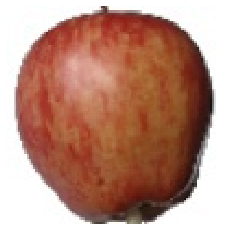

In [13]:
display(img)
# BGR Format

In [15]:
np.array(img).shape

(100, 100, 3)

### Flatten Image

In [22]:
img = img.resize((64,64))
img_arr = np.array(img)
img_flatten = img_arr.reshape(1, -1).T

In [23]:
img_flatten.shape

(12288, 1)

### Get minimum number of images

In [25]:
num_image_arr = []
for folder_path in glob('Dataset/*/'):
    folder_name = folder_path.split("\\")[1]
    all_images = glob(folder_path + "*.jpg")
    num_image_arr.append(len(all_images))
min_num_of_img = min(num_image_arr)
min_num_of_img

479

### Generate CSV

In [26]:
all_img_arr = []
for folder_path in glob('Dataset/*/'):
    folder_name = folder_path.split("\\")[1]
    all_images = glob(folder_path + "*.jpg")
    all_images = all_images[0:min_num_of_img]
    for img_path in all_images:
        img = Image.open(img_path)
        img_resize = img.resize((64, 64))
        img_arr = np.array(img_resize)
        img_flatten = img_arr.reshape(1, -1).T
        img_squeeze = np.squeeze(img_flatten)
        all_img_arr.append(img_squeeze)

KeyboardInterrupt: 

In [9]:
df = pd.DataFrame(all_img_arr)

In [11]:
df.rename(columns={i:f'Pixel {i}' for i in range(64 * 64 *3)}, inplace = True)

In [19]:
folder_name_arr = [folder_path.split("\\")[1] for folder_path in glob('Dataset/*/')]
label_arr = list(itertools.chain.from_iterable(itertools.repeat(x, min_num_of_img) for x in folder_name_arr))

In [25]:
df["Label"] = label_arr

### Output CSV

In [51]:
# df.to_csv("Image_Dataset.csv", index=False)

### Convert Dataset Image back to OpenCV Image

In [48]:
idx = 64
img = df.iloc[idx, 0:-1].values
img = img.reshape(64, 64, 3)
img = img.astype(np.int64)

## Construct Pipeline

1. Convert to Numpy Array
2. Resize image to 64 * 64
3. Use Color Histogram to reduce color intensity value of image
4. Flatten the numpy array
5. Extract area
6. Extract Perimeter
7. Put Label

## Principle Component Analysis

## Train Model

## Test Model

## Accuracy of the model